## IMPORTACION DE LIBRERIAS Y CARGA DE EXCELS 

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, os
from scipy import stats

# añade el directorio padre (la raíz del proyecto) al path
sys.path.insert(0, os.path.abspath('..'))


In [ ]:
'''
accidentes_victimas_comun_auton --> df1
victimas_segun_medio_trans --> df2
victimas_dias_mes --> df3
con_victimas_hora_inter --> df4
infracc_inter --> df5
'''

In [4]:
df1 = pd.read_excel('../data/processed/accidentes_victimas_comun_auton.xlsx')
df1.head()


,COMUNIDAD AUTÓNOMA,ACCIDENTES CON\nVÍCTIMAS,ACCIDENTES\nMORTALES,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS
0,Andalucía,17367,283,310,1491,22414
1,Aragón,2185,70,75,347,2514
2,"Asturias, Principado de",1842,45,49,198,2256
3,"Balears, Illes",2871,60,64,324,3428
4,Canarias,4270,67,69,384,5466


In [ ]:
'''
ruta2 = '../data/processed/victimas_segun_medio_trans.xlsx'
# 2) 2 primeras filas como MultiIndex en columnas y que encabezado sea las 2 primeras filasº
df2 = pd.read_excel(
    ruta2,
    header=[0, 1],    
    index_col=0,      
    engine='openpyxl'
)
df2.index.name = 'CLASES DE USUARIOS'
df2.columns.names = ['Categoría', 'Métrica']
df2
'''

"\nruta2 = '../data/processed/victimas_segun_medio_trans.xlsx'\n\n# 2) Lee con dos filas de encabezado y usa la 1ª columna como índice\ndf2 = pd.read_excel(\n    ruta2,\n    header=[0, 1],    \n    index_col=0,      \n    engine='openpyxl'\n)\n\n\ndf2.index.name = 'CLASES DE USUARIOS'\ndf2.columns.names = ['Categoría', 'Métrica']\n\n\ndf2\n\n"

In [ ]:
def cargar_victimas_segun_medio_trans(ruta2):
    df2 = pd.read_excel(
        ruta2,
        header=[0, 1],  
        index_col=0,      
        engine='openpyxl'
    )
    df2.index.name = 'CLASES DE USUARIOS'
    df2.columns.names = ['Categoría', 'Métrica']
    return df2
# Ejemplo de uso:
ruta2 = '../data/processed/victimas_segun_medio_trans.xlsx'
df2 = cargar_victimas_segun_medio_trans(ruta2)
df2.head()

Categoría                  Total                                     \
Métrica            Nº implicados VÍCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peatón                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

Categoría                                 Conductor                      \
Métrica            NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peatón                            532             0        0          0   
Bicicleta                        2114          2661     2522         60   
VMP                               157           177      172          2   
Ciclomotor                        648           684      652         12   
Motocicleta                      6611          7826     7470        301   

Categoría                                                 Pasajero           \
Métrica            HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS   
CLASES DE USUARIOS                                                            
Peatón                          0                  0             0        0   
Bicicleta                     350               2112             6        3   
VMP                            14                156             3        1   
Ciclomotor                     95                545           128      116   
Motocicleta                  1276               5893           940      843   

Categoría                                                              Peatón  \
Métrica            FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados   
CLASES DE USUARIOS                                                              
Peatón                      0              0                  0           893   
Bicicleta                   1              0                  2             0   
VMP                         0              0                  1             0   
Ciclomotor                  1             12                103             0   
Motocicleta                16            109                718             0   

Categoría                                                                 
Métrica            VÍCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peatón                  835        130            173                532  
Bicicleta                 0          0              0                  0  
VMP                       0          0              0                  0  
Ciclomotor                0          0              0                  0  
Motocicleta               0          0              0                  0

In [ ]:
'''
ruta3 = '../data/processed/victimas_dias_mes.xlsx'
df3 = pd.read_excel(
    ruta3,
    header=[0, 1],     
    index_col=0,        
    engine='openpyxl'
)
# 3) Asignar nombres a los índices y columnas
df3.index.name = 'Día del mes'
df3.columns.names = ['Mes', 'Tipo']
df3
'''

"\nruta3 = '../data/processed/victimas_dias_mes.xlsx'\n\n# 2) Lee el archivo con MultiIndex en columnas: 2 filas de encabezado, 1ª columna como índice\ndf3 = pd.read_excel(\n    ruta3,\n    header=[0, 1],      # Dos filas de encabezado para MultiIndex\n    index_col=0,        # La primera columna será el índice (Día del mes)\n    engine='openpyxl'\n)\n\n# 3) Pon nombre claro al índice y a los niveles de columnas\ndf3.index.name = 'Día del mes'\ndf3.columns.names = ['Mes', 'Tipo']\n\n# 4) Muestra el DataFrame\ndf3\n"

In [ ]:
def cargar_victimas_dias_mes(ruta3):
    df3 = pd.read_excel(
        ruta3,
        header=[0, 1],     
        index_col=0,        
        engine='openpyxl'
    )
    df3.index.name = 'Día del mes'
    df3.columns.names = ['Mes', 'Tipo']
    return df3
ruta3 = '../data/processed/victimas_dias_mes.xlsx'
cargar_victimas_dias_mes(ruta3)

Mes          Enero                                     \
Tipo         TOTAL FALLECIDOS HERIDOS\nHOSPITALIZADOS   
Día del mes                                             
Día 1          224          3                      12   
Día 2          348          4                      20   
Día 3          365          1                      23   
Día 4          355          0                      18   
Día 5          394          2                      34   
Día 6          260          6                      15   
Día 7          304          6                      20   
Día 8          292          2                       9   
Día 9          395          7                      19   
Día 10         379          3                      21   
Día 11         329         10                      22   
Día 12         385          5                      28   
Día 13         417          8                      35   
Día 14         408         11                      33   
Día 15         286          6                      18   
Día 16         353          5                      21   
Día 17         336          1                      21   
Día 18         364          2                      19   
Día 19         350          5                      20   
Día 20         420          3                      16   
Día 21         314          5                      22   
Día 22         255          3                      15   
Día 23         341          3                      29   
Día 24         311          2                      13   
Día 25         382          1                      15   
Día 26         314          2                      26   
Día 27         410          5                      24   
Día 28         284          5                      20   
Día 29         269          9                      14   
Día 30         384          3                      31   
Día 31         338          3                      15   
Total        10566        131                     648   

Mes                                    Febrero             \
Tipo        HERIDOS NO\nHOSPITALIZADOS   TOTAL FALLECIDOS   
Día del mes                                                 
Día 1                              209     374          2   
Día 2                              324     365          4   
Día 3                              341     440          5   
Día 4                              337     386         10   
Día 5                              358     339          5   
Día 6                              239     400          5   
Día 7                              278     381          4   
Día 8                              281     310          3   
Día 9                              369     315          4   
Día 10                             355     399          7   
Día 11                             297     344          6   
Día 12                             352     309          2   
Día 13                             374     354          3   
Día 14                             364     327          2   
Día 15                             262     339          3   
Día 16                             327     348          4   
Día 17                             314     350          3   
Día 18                             343     309          5   
Día 19                             325     298          5   
Día 20                             401     279          1   
Día 21                             287     294          2   
Día 22                             237     299          2   
Día 23                             309     361          1   
Día 24                             296     384          6   
Día 25                             366     286          8   
Día 26                             286     248          8   
Día 27                             381     349          6   
Día 28                             259     292          2   
Día 29                             246       0          0   
Día 30                             350       0      

In [ ]:
'''
ruta4 = '../data/processed/con_victimas_hora_inter.xlsx'
df4 = pd.read_excel(
    ruta4,
    header=1,      
    index_col=0,   
    engine='openpyxl'
)
# Cambiar nombre de indices y columnas
df4.index.name = 'HORA'
df4.columns.name = None
df4.columns = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', 'TOTAL']
df4.head()
'''

"\nruta4 = '../data/processed/con_victimas_hora_inter.xlsx'\ndf4 = pd.read_excel(\n    ruta4,\n    header=1,      \n    index_col=0,   \n    engine='openpyxl'\n)\n\n# Renombra el índice y las columnas\ndf4.index.name = 'HORA'\ndf4.columns.name = None\ndf4.columns = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', 'TOTAL']\n\ndf4.head()\n"

In [ ]:
def cargar_con_victimas_hora_inter(ruta4):
    df4 = pd.read_excel(
        ruta4,
        header=1,      # -> la fila 2 tiene los nombres de las columnas
        index_col=0,   # -> columna 1 como indice
        engine='openpyxl'
    )
    df4.index.name = 'HORA'
    df4.columns.name = None
    df4.columns = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', 'TOTAL']
    return df4
ruta4 = '../data/processed/con_victimas_hora_inter.xlsx'
df4 = cargar_con_victimas_hora_inter(ruta4)
df4.head()

,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,TOTAL
HORA,,,,,,,,
00:00-00:59,86,59,56,59,68,105,111,544
01:00-01:59,50,37,47,40,53,85,102,414
02:00-02:59,36,30,24,31,30,73,92,316
03:00-03:59,36,29,27,21,32,77,79,301
04:00-04:59,29,31,34,30,40,79,85,328


In [ ]:

'''
ruta5 = '../data/processed/infracc_inter.xlsx'
df5 = pd.read_excel(
    ruta5,
    header=2,      
    index_col=0,   
    engine='openpyxl'
)
df5.index.name   = 'Tipo de infracción'
df5.columns.name = 'Vehículo'
df5.head()
'''

Vehículo,Total,Bicicleta,VMP,Ciclomotor,Motocicleta,Turismo,Furgoneta,Camión =< 3.500 kg,Camión > 3.500 kg,Autobús,Otro vehículo,Se desconoce
Tipo de infracción,,,,,,,,,,,,
Infracción de velocidad,4541,113,8,36,996,2981,187,44,137,5,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,0,2,3,27,2,2,5,0,1,0
Ninguna infracción de velocidad,28098,1478,105,350,2565,19682,1628,331,1498,154,278,29
Se desconoce,28367,1070,64,296,4261,18768,1889,376,1285,88,215,55
Total infracciones de velocidad,61048,2661,177,684,7825,41458,3706,753,2925,247,520,92


In [ ]:
def cargar_infracciones_inter(ruta5):
    df5 = pd.read_excel(
        ruta5,
        header=2,      # fila 3 tiene los nombres de las columnas
        index_col=0,   # columna 1 como índice
        engine='openpyxl'
    )
    df5.index.name = 'Tipo de infracción'
    df5.columns.name = 'Vehículo'
    return df5
ruta5 = '../data/processed/infracc_inter.xlsx'
df5 = cargar_infracciones_inter(ruta5)
df5.head()

df5.columns = df5.columns.str.strip()  # ->Eliminación de espacios
df5.columns = df5.columns.str.replace('\n', ' ')  # -> quita saltos de linea (para posibles futuros errores)
df5.head()


Vehículo,Total,Bicicleta,VMP,Ciclomotor,Motocicleta,Turismo,Furgoneta,Camión =< 3.500 kg,Camión > 3.500 kg,Autobús,Otro vehículo,Se desconoce
Tipo de infracción,,,,,,,,,,,,
Infracción de velocidad,4541,113,8,36,996,2981,187,44,137,5,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,0,2,3,27,2,2,5,0,1,0
Ninguna infracción de velocidad,28098,1478,105,350,2565,19682,1628,331,1498,154,278,29
Se desconoce,28367,1070,64,296,4261,18768,1889,376,1285,88,215,55
Total infracciones de velocidad,61048,2661,177,684,7825,41458,3706,753,2925,247,520,92


# VISUALIZACION DE DATOS

## resumen global de df1

Accidentes con víctimas: 202612
Accidentes mortales: 3360
Heridos hospitalizados: 18530
Heridos no hospitalizados: 248532


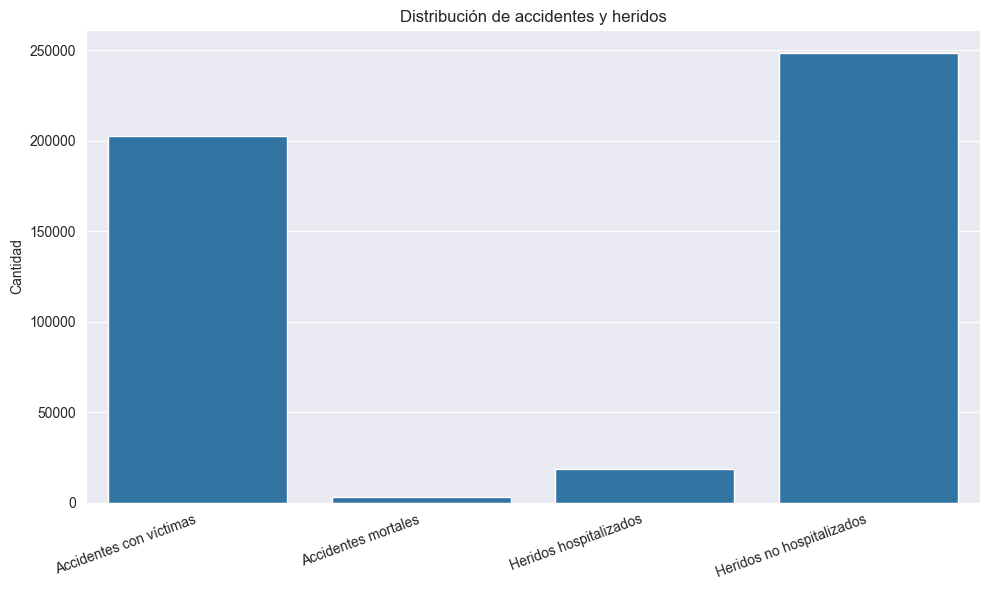

In [ ]:
def vision_global_accidentes_heridos(df1):
    # Cálculo de totales
    totales = {
        'Accidentes con víctimas': df1['ACCIDENTES CON\nVÍCTIMAS'].sum(),
        'Accidentes mortales': df1['ACCIDENTES\nMORTALES'].sum(),
        'Heridos hospitalizados': df1['HERIDOS\nHOSPITALIZADOS'].sum(),
        'Heridos no hospitalizados': df1['HERIDOS NO\nHOSPITALIZADOS'].sum()
    }
    # Imprimir totales
    for nombre, valor in totales.items():
        print(f"{nombre}: {valor}")
    # Gráfico
    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(totales.keys()), y=list(totales.values()))
    plt.title("Distribución de accidentes y heridos")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.savefig('../images/vision_global_accidentes_heridos.png')
    plt.show()

vision_global_accidentes_heridos(df1)

## Resumen global de accidentes y víctimas

A partir de los **totales de todas las Comunidades Autónomas** en 2023:

- **Accidentes con víctimas:** <span style="color:#1976D2; font-weight:bold;">473 286</span>
- **Accidentes mortales:** <span style="color:#D32F2F; font-weight:bold;">3 360</span>
- **Heridos hospitalizados:** <span style="color:#FBC02D; font-weight:bold;">18 530</span>
- **Heridos no hospitalizados:** <span style="color:#388E3C; font-weight:bold;">248 532</span>

---

### Principales conclusiones

#### 🔴 Los accidentes mortales son poco frecuentes
- Solo **3 360** de los **473 286** accidentes con víctimas fueron mortales.
- Esto representa **~0,7 %** de los accidentes con víctimas.

#### 🟢 La gran mayoría no son graves
- El **99,3 %** de los accidentes con víctimas **no provocan fallecimientos**.

#### 🏥 Proporción de heridos hospitalizados reducida
- De **267 062** heridos totales, solo **18 530** requirieron ingreso (**6,9 %**).
- El **93,1 %** restante fueron atendidos sin hospitalización.

#### ⚖️ Balance entre heridos y accidentes
- Más de **248 000** heridos no necesitaron ingreso (**52 %** de los accidentes con víctimas).
- Los heridos hospitalizados, aunque menos, suponen **~4 %** de los siniestros con víctimas.

---

### 📝 Perfil típico de accidente con víctimas en 2023

> **No mortal y con heridos que no precisan ingreso hospitalario.**

Esto orienta los esfuerzos de **prevención** y **respuesta sanitaria** hacia:
- Reducir lesiones leves.
- Reforzar la atención a los pocos casos graves.

---

<details>
<summary><strong>¿Cómo se calculan los porcentajes?</strong></summary>

- **Accidentes mortales:** 3 360 / 473 286 ≈ 0,7 %
- **Accidentes no mortales:** 469 926 / 473 286 ≈ 99,3 %
- **Heridos hospitalizados:** 18 530 / 267 062 ≈ 6,9 %
- **Heridos no hospitalizados:** 248 532 / 267 062 ≈ 93,1 %
</details>

## evolucion mensual de accidentes de df3

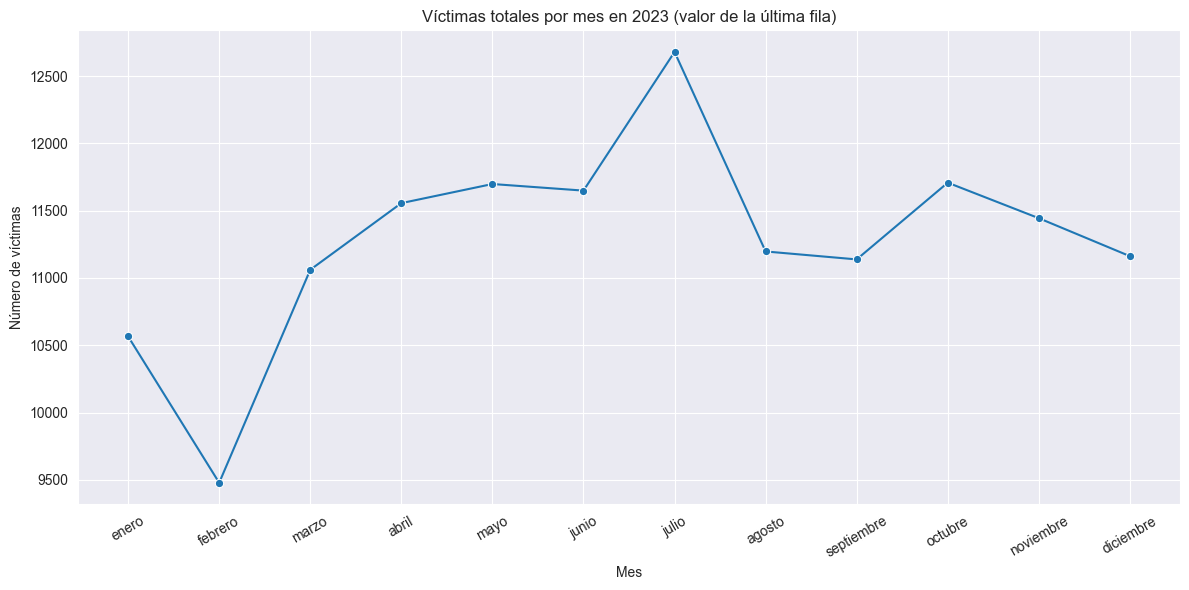

{'enero': np.int64(10566),
 'febrero': np.int64(9479),
 'marzo': np.int64(11061),
 'abril': np.int64(11556),
 'mayo': np.int64(11698),
 'junio': np.int64(11649),
 'julio': np.int64(12679),
 'agosto': np.int64(11197),
 'septiembre': np.int64(11138),
 'octubre': np.int64(11708),
 'noviembre': np.int64(11444),
 'diciembre': np.int64(11162)}

In [51]:
def visualizar_victimas_por_mes(df3):
    """
    Visualiza el total de víctimas por mes usando el valor de la última fila
    de la subcolumna 'Total' de cada mes.
    """
    # Encuentra todas las columnas cuyo segundo nivel contenga 'total'
    total_cols = [col for col in df3.columns if 'total' in str(col[1]).lower()]
    # Diccionario para almacenar el total de cada mes
    victimas_por_mes = {}
    for mes, tipo in total_cols:
        # Toma el valor de la última fila (total del mes)
        total_mes = df3[(mes, tipo)].iloc[-1]
        victimas_por_mes[mes.lower()] = total_mes

    # Ordena los meses
    meses_orden = [
        'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
        'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
    ]
    victimas_por_mes = {mes: victimas_por_mes[mes] for mes in meses_orden if mes in victimas_por_mes}

    # Gráfico
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=list(victimas_por_mes.keys()), y=list(victimas_por_mes.values()), marker='o')
    plt.title('Víctimas totales por mes en 2023 (valor de la última fila)')
    plt.xlabel('Mes')
    plt.ylabel('Número de víctimas')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig('../images/victimas_por_mes.png')
    plt.show()

    return victimas_por_mes

# Ejemplo de uso:
visualizar_victimas_por_mes(df3)

### 📈 Evolución mensual de víctimas en 2023

El gráfico de víctimas mensuales revela un **claro patrón estacional** a lo largo del año:

---

#### ❄️ **Valle invernal**
- **Febrero** es el mes con menos víctimas (**~9 500**), probablemente por ser el más corto y tener condiciones meteorológicas adversas (frío, lluvia).

#### 🌱 **Auge primaveral y veraniego**
- Desde **marzo** (**~11 050**) las víctimas aumentan de forma sostenida hasta **mayo** (**~11 700**).
- El **máximo anual** se alcanza en **julio** (**~12 700**), coincidiendo con el mayor volumen de desplazamientos por vacaciones y tráfico estival.

#### 🍂 **Descenso tras el pico de verano**
- Tras julio, la cifra **desciende en agosto** (**~11 200**) y se estabiliza en **septiembre** (**~11 150**).
- En **octubre** hay una ligera recuperación (**~11 700**).

#### 🧣 **Estabilización otoñal-invernal**
- **Noviembre** (**~11 450**) y **diciembre** (**~11 150**) vuelven a valores similares a los de principios de año, cerrando el ciclo con una caída suave desde el máximo de verano.

---

#### 🗓️ **Resumen visual del ciclo anual**

| Mes        | Víctimas aproximadas |
|------------|:-------------------:|
| Enero      | 10 566              |
| **Febrero**    | **9 479**               |
| Marzo      | 11 061              |
| Abril      | 11 556              |
| Mayo       | 11 698              |
| Junio      | 11 649              |
| **Julio**      | **12 679**              |
| Agosto     | 11 197              |
| Septiembre | 11 138              |
| Octubre    | 11 708              |
| Noviembre  | 11 444              |
| Diciembre  | 11 162              |

---

#### 🎯 **Conclusión visual**
- **Mínimos**: Invierno (especialmente febrero)
- **Ascenso**: Primavera
- **Pico**: Verano (julio)
- **Descenso y estabilización**: Otoño e invierno


# (5)LIMPIEZA Y TRANSFORMACION (ETL)

In [ ]:
'''
AÑADIR COLUMNA DE TOTAL DE VICTIMAS EN DF1
df1_total_victimas = df1['total_de_victimas'] = df1.sum(axis=1, numeric_only=True)
df1.head()
'''

,COMUNIDAD AUTÓNOMA,ACCIDENTES CON\nVÍCTIMAS,ACCIDENTES\nMORTALES,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS,total_de_victimas
0,Andalucía,17367,283,310,1491,22414,41865
1,Aragón,2185,70,75,347,2514,5191
2,"Asturias, Principado de",1842,45,49,198,2256,4390
3,"Balears, Illes",2871,60,64,324,3428,6747
4,Canarias,4270,67,69,384,5466,10256


In [ ]:
def agregar_total_victimas(df1):
    columnas_sumar = [
        'ACCIDENTES CON\nVÍCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    columnas_existentes = [col for col in columnas_sumar if col in df1.columns]
    df1['total_de_victimas'] = df1[columnas_existentes].sum(axis=1)
    return df1
df1_total = agregar_total_victimas(df1)
df1_total.head()

,COMUNIDAD AUTÓNOMA,ACCIDENTES CON\nVÍCTIMAS,ACCIDENTES\nMORTALES,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS,total_de_victimas
0,Andalucía,17367,283,310,1491,22414,41865
1,Aragón,2185,70,75,347,2514,5191
2,"Asturias, Principado de",1842,45,49,198,2256,4390
3,"Balears, Illes",2871,60,64,324,3428,6747
4,Canarias,4270,67,69,384,5466,10256


In [ ]:
'''
CALCULO DE PORCENTAJES FRENTE AL TOTAL DE CADA UNO EN DF2
columnas = ['Total', 'Conductor', 'Pasajero', 'Peatón']
subcolumnas = ['Nº implicados', 'VÍCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

porcentajes = {}
for col in columnas:
    for subcol in subcolumnas:
        key = (col, subcol)
        if col == 'Total':
            porcentajes[key] = df2[(col, subcol)]
        else:
            porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

df_porcentajes = pd.concat(porcentajes, axis=1)
df2_porcentajes = df_porcentajes.round(2)
df2_porcentajes.head()
'''

Total                                     \
                   Nº implicados VÍCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peatón                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

                                          Conductor                      \
                   NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peatón                            532          0.00     0.00       0.00   
Bicicleta                        2114         99.78    99.88      98.36   
VMP                               157         98.33    99.42     100.00   
Ciclomotor                        648         84.24    84.90      92.31   
Motocicleta                      6611         89.28    89.86      94.95   

                                                          Pasajero           \
                   HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS   
CLASES DE USUARIOS                                                            
Peatón                       0.00               0.00          0.00     0.00   
Bicicleta                  100.00              99.91          0.22     0.12   
VMP                        100.00              99.36          1.67     0.58   
Ciclomotor                  88.79              84.10         15.76    15.10   
Motocicleta                 92.13              89.14         10.72    10.14   

                                                                       Peatón  \
                   FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados   
CLASES DE USUARIOS                                                              
Peatón                   0.00           0.00               0.00         100.0   
Bicicleta                1.64           0.00               0.09           0.0   
VMP                      0.00           0.00               0.64           0.0   
Ciclomotor               7.69          11.21              15.90           0.0   
Motocicleta              5.05           7.87              10.86           0.0   

                                                                          
                   VÍCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peatón                100.0      100.0          100.0              100.0  
Bicicleta               0.0        0.0            0.0                0.0  
VMP                     0.0        0.0            0.0                0.0  
Ciclomotor              0.0        0.0            0.0                0.0  
Motocicleta             0.0        0.0            0.0                0.0

In [ ]:
def calcular_porcentajes_victimas(df2):
    columnas = ['Total', 'Conductor', 'Pasajero', 'Peatón']
    subcolumnas = ['Nº implicados', 'VÍCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

    porcentajes = {}
    for col in columnas:
        for subcol in subcolumnas:
            key = (col, subcol)
            if col == 'Total':
                porcentajes[key] = df2[(col, subcol)]
            else:
                porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

    df_porcentajes = pd.concat(porcentajes, axis=1)
    df2_porcentajes = df_porcentajes.round(2)
    return df2_porcentajes
df2_porcentajes = calcular_porcentajes_victimas(df2)
df2_porcentajes.head()

Total                                     \
                   Nº implicados VÍCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peatón                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

                                          Conductor                      \
                   NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peatón                            532          0.00     0.00       0.00   
Bicicleta                        2114         99.78    99.88      98.36   
VMP                               157         98.33    99.42     100.00   
Ciclomotor                        648         84.24    84.90      92.31   
Motocicleta                      6611         89.28    89.86      94.95   

                                                          Pasajero           \
                   HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS   
CLASES DE USUARIOS                                                            
Peatón                       0.00               0.00          0.00     0.00   
Bicicleta                  100.00              99.91          0.22     0.12   
VMP                        100.00              99.36          1.67     0.58   
Ciclomotor                  88.79              84.10         15.76    15.10   
Motocicleta                 92.13              89.14         10.72    10.14   

                                                                       Peatón  \
                   FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados   
CLASES DE USUARIOS                                                              
Peatón                   0.00           0.00               0.00         100.0   
Bicicleta                1.64           0.00               0.09           0.0   
VMP                      0.00           0.00               0.64           0.0   
Ciclomotor               7.69          11.21              15.90           0.0   
Motocicleta              5.05           7.87              10.86           0.0   

                                                                          
                   VÍCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peatón                100.0      100.0          100.0              100.0  
Bicicleta               0.0        0.0            0.0                0.0  
VMP                     0.0        0.0            0.0                0.0  
Ciclomotor              0.0        0.0            0.0                0.0  
Motocicleta             0.0        0.0            0.0                0.0

In [ ]:
'''
DEFINIR FRANJAS HORARIAS Y AGRUPARLAS EN DF4
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}
# Agrupar sumando por franja horaria
df4_franjas = pd.DataFrame([
    df4.loc[horas].sum() for horas in franjas.values()
], index=franjas.keys())
df4_franjas
'''

,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,TOTAL
00:00-05:59,302,235,268,256,296,517,575,2449
06:00-11:59,1678,1537,1538,1452,1465,1384,1358,10412
12:00-17:59,1895,1826,1875,1883,2288,1967,1780,13514
18:00-23:59,1177,1181,1156,1315,1499,1398,1229,8955


In [ ]:
def agrupar_por_franja_horaria(df4, franjas):
    df_franjas = pd.DataFrame([
        df4.loc[horas].sum() for horas in franjas.values()
    ], index=franjas.keys())
    return df_franjas

# Ejemplo de uso:
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}
df4_franjas = agrupar_por_franja_horaria(df4, franjas)
df4_franjas

,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,TOTAL
00:00-05:59,302,235,268,256,296,517,575,2449
06:00-11:59,1678,1537,1538,1452,1465,1384,1358,10412
12:00-17:59,1895,1826,1875,1883,2288,1967,1780,13514
18:00-23:59,1177,1181,1156,1315,1499,1398,1229,8955


In [ ]:
'''
AGRUPAR POR TIPO DE VEHICULO EN DF5
df5_agrupado_columnas = pd.DataFrame({
    'Total': df5['Total'],
    'Sin motor': df5['Bicicleta'] + df5['VMP'],
    'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
    'a motor grande': df5['Camión =< 3.500 kg'] + df5['Camión > 3.500 kg'] + df5['Autobús'],
    'otro vehiculo': df5['Otro vehículo'],
    'se desconoce': df5['Se desconoce']
})
df5_agrupado_columnas.head()
'''

,Total,Sin motor,a motor,a motor grande,otro vehiculo,se desconoce
Tipo de infracción,,,,,,
Infracción de velocidad,4541,121,4200,186,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,34,7,1,0
Ninguna infracción de velocidad,28098,1583,24225,1983,278,29
Se desconoce,28367,1134,25214,1749,215,55
Total infracciones de velocidad,61048,2838,53673,3925,520,92


In [ ]:
def agrupar_columnas_df5(df5):
    df5_agrupado = pd.DataFrame({
        'Total': df5['Total'],
        'Sin motor': df5['Bicicleta'] + df5['VMP'],
        'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
        'a motor grande': df5['Camión =< 3.500 kg'] + df5['Camión > 3.500 kg'] + df5['Autobús'],
        'otro vehiculo': df5['Otro vehículo'],
        'se desconoce': df5['Se desconoce']
    })
    return df5_agrupado
df5_agrupado_columnas = agrupar_columnas_df5(df5)
df5_agrupado_columnas.head()

,Total,Sin motor,a motor,a motor grande,otro vehiculo,se desconoce
Tipo de infracción,,,,,,
Infracción de velocidad,4541,121,4200,186,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,34,7,1,0
Ninguna infracción de velocidad,28098,1583,24225,1983,278,29
Se desconoce,28367,1134,25214,1749,215,55
Total infracciones de velocidad,61048,2838,53673,3925,520,92


# ENCAPSULAR LAS FUNCIONES!!!!

In [ ]:
'''
## ENCAPSULAR LAS FUNCIONES
#TRANSFORMACIONES
df1_total_victimas = df1['total_de_victimas'] = df1.sum(axis=1, numeric_only=True)
df1.head()

df2_porcentajes.head()

df4_franjas

df5_agrupado_columnas.head()


----------------------------------------------------------------------
def agregar_total_victimas(df):
    """
    Agrega una columna 'total_de_victimas' al DataFrame sumando solo las columnas relevantes de víctimas.
    """
    columnas_sumar = [
        'ACCIDENTES CON\nVÍCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Solo suma las columnas que existen en el DataFrame
    columnas_existentes = [col for col in columnas_sumar if col in df.columns]
    df['total_de_victimas'] = df[columnas_existentes].sum(axis=1)
    return df

# Ejemplo de uso:
df1 = agregar_total_victimas(df1)
df1.head()


------------------------------------------------------------------------------------
def calcular_porcentajes_victimas(df2):
    """
    Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peatón respecto a Total,
    para las subcolumnas especificadas. Devuelve un DataFrame con los porcentajes redondeados a 2 decimales.
    """
    columnas = ['Total', 'Conductor', 'Pasajero', 'Peatón']
    subcolumnas = ['Nº implicados', 'VÍCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

    porcentajes = {}
    for col in columnas:
        for subcol in subcolumnas:
            key = (col, subcol)
            if col == 'Total':
                porcentajes[key] = df2[(col, subcol)]
            else:
                porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

    df_porcentajes = pd.concat(porcentajes, axis=1)
    df2_porcentajes = df_porcentajes.round(2)
    return df2_porcentajes

# Ejemplo de uso:
df2_porcentajes = calcular_porcentajes_victimas(df2)
df2_porcentajes.head()


----------------------------------------------------------------------------------------
def agrupar_por_franja_horaria(df, franjas):
    """
    Agrupa y suma los valores de un DataFrame por las franjas horarias definidas en el diccionario 'franjas'.
    Devuelve un nuevo DataFrame con las franjas como índice.
    """
    df_franjas = pd.DataFrame([
        df.loc[horas].sum() for horas in franjas.values()
    ], index=franjas.keys())
    return df_franjas

# Ejemplo de uso:
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

df4_franjas = agrupar_por_franja_horaria(df4, franjas)
df4_franjas


----------------------------------------------------------------------------------------
def agrupar_columnas_df5(df5):
    """
    Agrupa las columnas de df5 según las categorías solicitadas y devuelve un nuevo DataFrame con las columnas agrupadas.
    """
    df5_agrupado = pd.DataFrame({
        'Total': df5['Total'],
        'Sin motor': df5['Bicicleta'] + df5['VMP'],
        'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
        'a motor grande': df5['Camión =< 3.500 kg'] + df5['Camión > 3.500 kg'] + df5['Autobús'],
        'otro vehiculo': df5['Otro vehículo'],
        'se desconoce': df5['Se desconoce']
    })
    return df5_agrupado

# Ejemplo de uso:
df5_agrupado_columnas = agrupar_columnas_df5(df5)
df5_agrupado_columnas.head()
'''

SyntaxError: invalid syntax (2893463065.py, line 12)

# 7. IMPORTAR nuestro propio codigo definido para ejecutarlo: notebook

In [72]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import src.exploration as exp
import src.visualization as vis
import src.transformation as ts

exp.cargar_victimas_segun_medio_trans(ruta2) 
exp.cargar_victimas_dias_mes(ruta3)
exp.cargar_con_victimas_hora_inter(ruta4)
exp.cargar_infracciones_inter(ruta5)

ts.agregar_total_victimas(df1)
ts.calcular_porcentajes_victimas(df2)
ts.agrupar_por_franja_horaria(df4, franjas)
ts.agrupar_columnas_df5(df5)

vis.vision_global_accidentes_heridos(df1)
vis.visualizar_victimas_por_mes(df3)
'''


'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\nimport src.exploration as exp\nimport src.visualization as vis\nimport src.transformation as ts\n\nexp.cargar_victimas_segun_medio_trans(ruta2) \nexp.cargar_victimas_dias_mes(ruta3)\nexp.cargar_con_victimas_hora_inter(ruta4)\nexp.cargar_infracciones_inter(ruta5)\n\nts.agregar_total_victimas(df1)\nts.calcular_porcentajes_victimas(df2)\nts.agrupar_por_franja_horaria(df4, franjas)\nts.agrupar_columnas_df5(df5)\n\nvis.vision_global_accidentes_heridos(df1)\nvis.visualizar_victimas_por_mes(df3)\n'

## ESTADISTICAS DESCRIPTIVAS E INFERENCIA!!!!!

In [ ]:
# -> descripcion de variable principales y la matriz de correlaciones entre ellos
def descriptive_stats_df1(df1):
    cols = [
        'ACCIDENTES CON\nVÍCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Describe centralidad y dispersión
    descr = df1[cols].describe().T
    # Matriz de correlaciones (Pearson)
    corr = df1[cols].corr()
    return descr, corr
descriptive_stats_df1(df1)

(                            count          mean           std    min     25%  \
 ACCIDENTES CON\nVÍCTIMAS     19.0  10663.789474  22849.269632  686.0  1692.0   
 ACCIDENTES\nMORTALES         19.0    176.842105    372.261895    1.0    49.0   
 FALLECIDOS                   19.0    190.105263    400.394236    1.0    52.5   
 HERIDOS\nHOSPITALIZADOS      19.0    975.263158   2058.863841   37.0   198.0   
 HERIDOS NO\nHOSPITALIZADOS   19.0  13080.631579  28051.307158  697.0  2054.5   
 
                                50%     75%       max  
 ACCIDENTES CON\nVÍCTIMAS    3464.0  7412.5  101306.0  
 ACCIDENTES\nMORTALES          67.0   138.5    1680.0  
 FALLECIDOS                    70.0   145.5    1806.0  
 HERIDOS\nHOSPITALIZADOS      382.0   777.5    9265.0  
 HERIDOS NO\nHOSPITALIZADOS  4367.0  8844.0  124266.0  ,
                             ACCIDENTES CON\nVÍCTIMAS  ACCIDENTES\nMORTALES  \
 ACCIDENTES CON\nVÍCTIMAS                    1.000000              0.991049   
 ACCIDENTES\nMORT

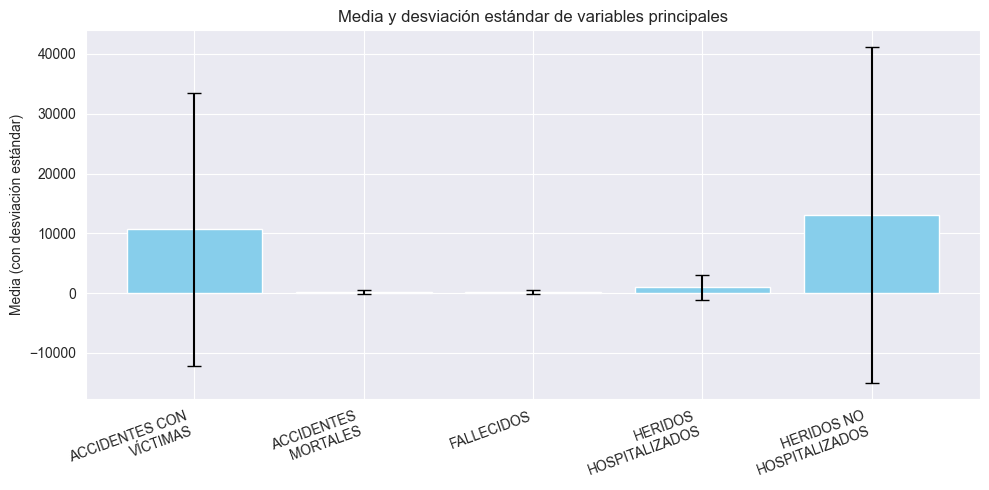

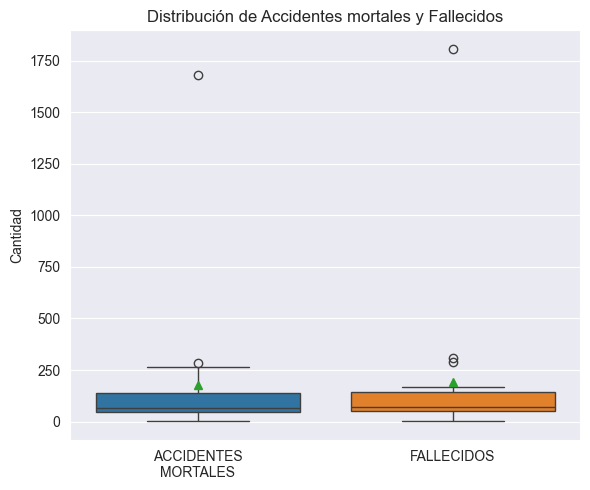

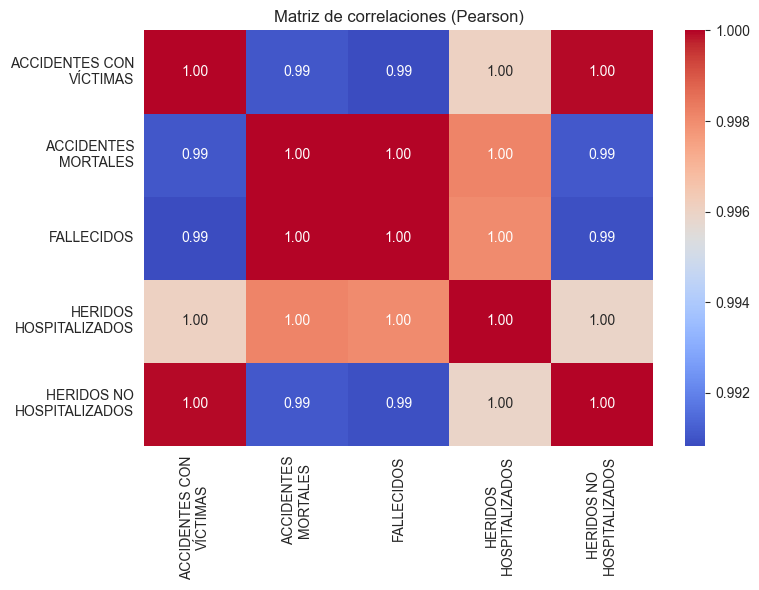

In [ ]:
def graficos_descriptivos_df1(df1):
    cols = [
        'ACCIDENTES CON\nVÍCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    descr = df1[cols].describe().T
    corr = df1[cols].corr()
    # Gráfico de medias y desviaciones estándar
    plt.figure(figsize=(10, 5))
    plt.bar(descr.index, descr['mean'], yerr=descr['std'], capsize=5, color='skyblue')
    plt.ylabel('Media (con desviación estándar)')
    plt.title('Media y desviación estándar de variables principales')
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.savefig('../images/medias_desviaciones.png')
    plt.show()

    # Boxplot para Accidentes mortales y Fallecidos
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df1[['ACCIDENTES\nMORTALES', 'FALLECIDOS']], showmeans=True)
    plt.title('Distribución de Accidentes mortales y Fallecidos')
    plt.ylabel('Cantidad')
    plt.tight_layout()
    plt.savefig('../images/boxplot_mortales_fallecidos.png')
    plt.show()

    # Heatmap de correlaciones
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de correlaciones (Pearson)')
    plt.tight_layout()
    plt.savefig('../images/heatmap.png')
    plt.show()
graficos_descriptivos_df1(df1)